# Exploratory data analysis (EDA) for Haberman dataset

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# loading data from haberman.csv into a pandas datarame
haberman_df = pd.read_csv("haberman.csv",names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])

# Checking data is load or not  and if loaded then size of data
print(haberman_df.shape)
print(haberman_df.head())

(306, 4)
   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


In [25]:
print(haberman_df.columns)
print(haberman_df['survival_status_after_5_years'].value_counts());

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')
1    225
2     81
Name: survival_status_after_5_years, dtype: int64


In [26]:
# Mapping the coloumn survival_status_after_5_year into readable format
haberman_df['survival_status_after_5_years'] = haberman_df['survival_status_after_5_years'].map({1: 'survived', 2 : 'died'})

In [27]:
haberman_df.head()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [28]:
haberman_df.info()
haberman_df['survival_status_after_5_years'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


array(['survived', 'died'], dtype=object)

In [31]:
haberman_df.describe()

,age,year_of_treatment,positive_lymph_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Observation

In [ ]:
# There are no missing values in this data set. So there is no need to do data imputation.
# Total number of points is 306
# Total number of numer of features is 3
# Total number of classes is 2
# Total number of data-points of class 1 (Survived)is 225 and total number of class 2 (died) is 81,It shows that,this is unbalanced dataset 

# Univariate Analysis

In [33]:
# Extracting rows on the basis of different class
haberman_survived = haberman_df.loc[haberman_df['survival_status_after_5_years'] == 'survived']
haberman_died = haberman_df.loc[haberman_df['survival_status_after_5_years'] == 'died']

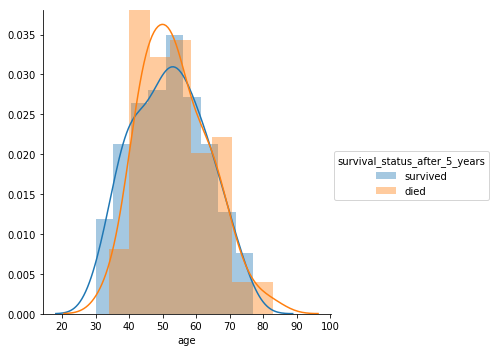

In [35]:
#plotting age features 
sns.FacetGrid(haberman_df, hue= 'survival_status_after_5_years',size=5).map(sns.distplot,"age").add_legend();
plt.show()

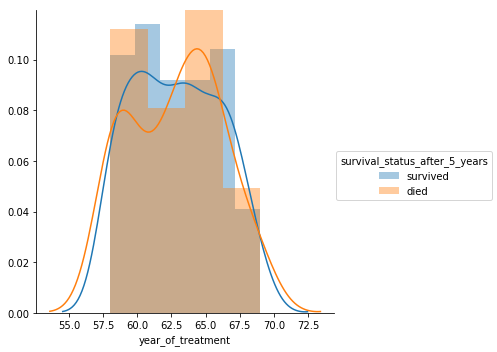

In [36]:
#plotting year_of_treatment features
sns.FacetGrid(haberman_df, hue='survival_status_after_5_years',size=5).map(sns.distplot,'year_of_treatment').add_legend();
plt.show();

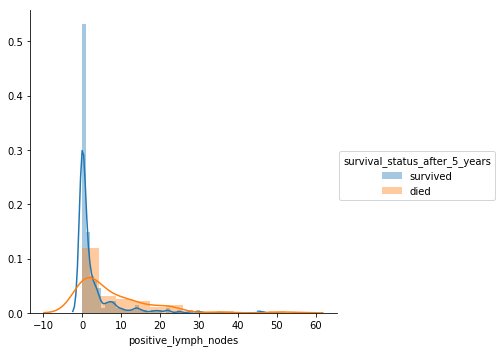

In [37]:
# Plotting positive_lymph_nodes Features
sns.FacetGrid(haberman_df,hue="survival_status_after_5_years", size=5).map(sns.distplot,'positive_lymph_nodes').add_legend()
plt.show();

# Observations

In [ ]:
# We cant gather too much information from 'age' and 'tratement_of_age' Features as the graph for survived and died is overlapping too much
# We can get some information from 'positive_lymph_nodes' Fetaures as the graph for survived and died data is not overlapping too much
# and we can get one more information from 'age' feature is that,age below 33 ,\
#                           there is more chances of survival and age after 75 ,chance of death is more

# PDF and CDF of Different Features

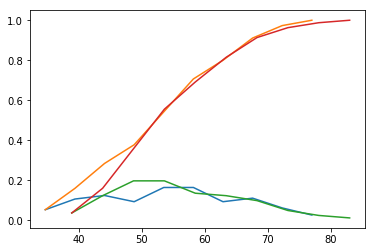

In [54]:
# Plotting of PDF and CDF of "age"

#survived data analysis 

counts, bin_edges = np.histogram(haberman_survived['age'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# died data analysis
counts, bin_edges = np.histogram(haberman_died['age'], bins= 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

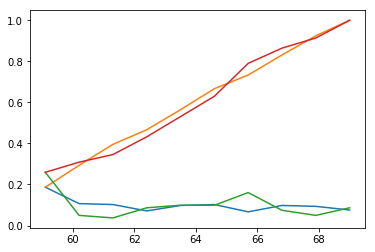

In [58]:
# Plotting of PDF and CDF of "year_of_treatment"

#survived data analysis 

counts, bin_edges = np.histogram(haberman_survived['year_of_treatment'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# died data analysis
counts, bin_edges = np.histogram(haberman_died['year_of_treatment'], bins = 10, density= True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

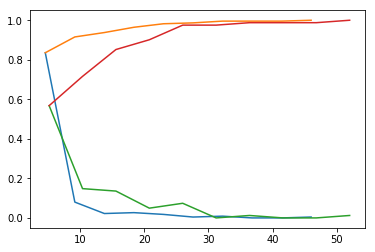

In [59]:
# Plotting of PDF and CDF of "positive_lymph_nodes"

#survived data analysis 

counts, bin_edges = np.histogram(haberman_survived['positive_lymph_nodes'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# died data analysis
counts, bin_edges = np.histogram(haberman_died['positive_lymph_nodes'], bins = 10, density= True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

# Boxplot and Whiskers of different Features

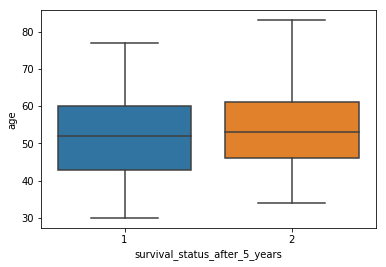

In [62]:
# Boxplot of "age"
sns.boxplot(x='survival_status_after_5_years', y = 'age', data= haberman_df)
plt.show()

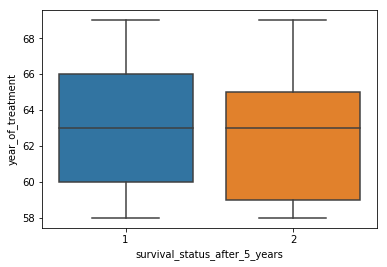

In [63]:
# Boxplot of "year_of_treatment"
sns.boxplot(x='survival_status_after_5_years', y = 'year_of_treatment', data= haberman_df)
plt.show()

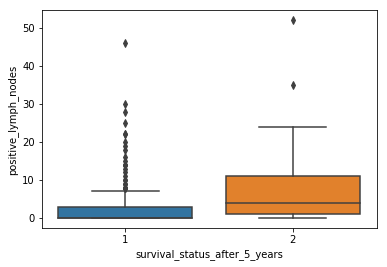

In [64]:
# Boxplot of "positive_lymph_nodes"
sns.boxplot(x='survival_status_after_5_years', y = 'positive_lymph_nodes', data= haberman_df)
plt.show()

# Violin Plots of different Fetures

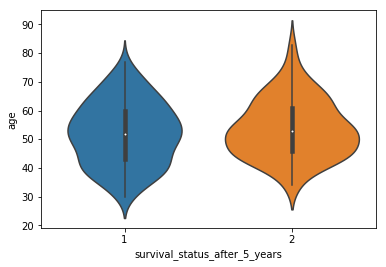

In [66]:
# violin plot of "age"
sns.violinplot(x='survival_status_after_5_years', y = 'age', data= haberman_df)
plt.show()

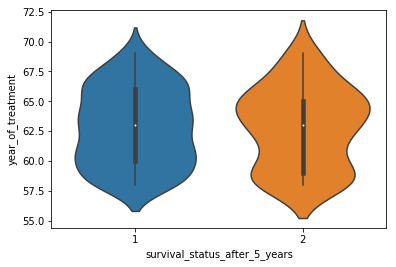

In [67]:
# violin plot of "year_of_treatment"
sns.violinplot(x='survival_status_after_5_years', y = 'year_of_treatment', data= haberman_df)
plt.show()

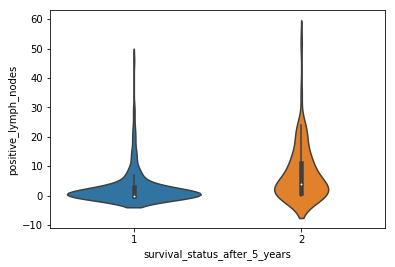

In [68]:
# violin plot of "positive_lymph_nodes"
sns.violinplot(x='survival_status_after_5_years', y = 'positive_lymph_nodes', data= haberman_df)
plt.show()

# Observations

In [69]:
# Most of the people survived between age 43 to 60 and most of the people died is age between 45 to 62

# As u can see that from year 1959-1960 , the number of death is more and from 1960 to 1964 the death and survival is similar \
#                   , but after 1965 the survival is much more than death.so we can conclude tht due to technological advancement\
#                    the number of survival increases

# As the number of positive_lymph_nodes is less than 3, The chances of Survival is more.



# So after Univariate Analysis we can conclude that 'positive_lymph_nodes'  is the most important Features for Classification

# BiVariate Analysis 

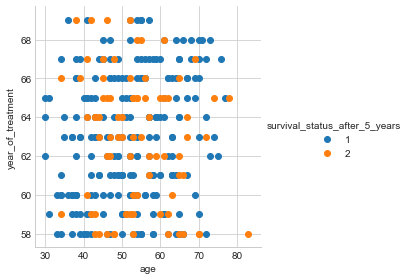

In [81]:
# Scatter Plot

sns.set_style("whitegrid");
sns.FacetGrid(haberman_df ,hue="survival_status_after_5_years",size=4).map(plt.scatter,"age","year_of_treatment").add_legend();
plt.show()


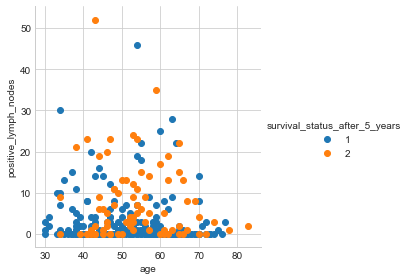

In [82]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df ,hue="survival_status_after_5_years",size=4).map(plt.scatter,"age","positive_lymph_nodes").add_legend();
plt.show()

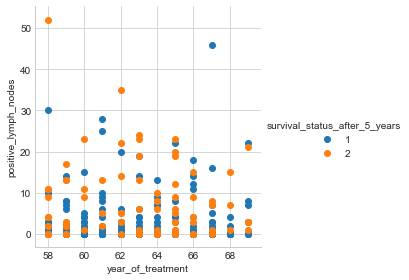

In [83]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df ,hue="survival_status_after_5_years",size=4).map(plt.scatter,"year_of_treatment","positive_lymph_nodes").add_legend();
plt.show()

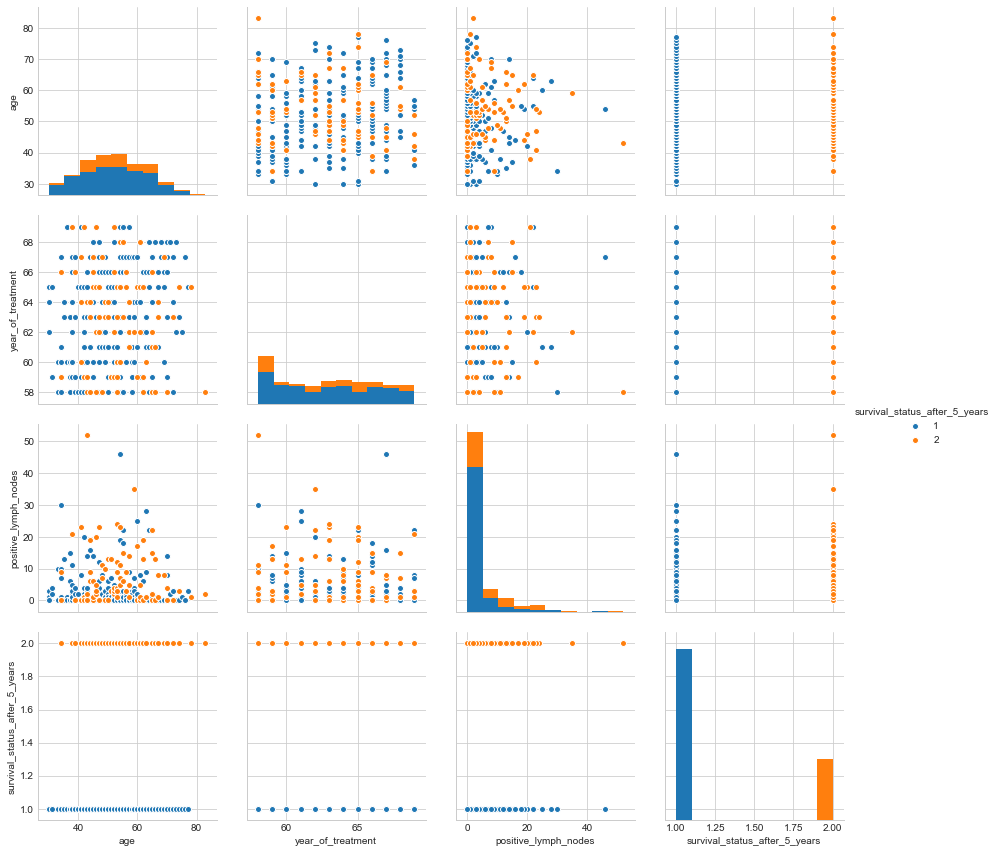

In [87]:
# Pair Plot

sns.set_style("whitegrid");
sns.pairplot(haberman_df,hue="survival_status_after_5_years",size=3);
plt.show()

# Summarizing Plots

In [ ]:
# After Univariate and Bivariate analysis,only "positive_lymph_nodes" is important Features,As the number of positive_lymph_nodes is less than 3, The chances of \
#           Survival is more.